# Binary Classification Problem
### Methodology:
<li> Data exploratory
<li> Data cleaning
<li> One-Hot Encoding
<li> Feature scaling
<li> Modeling
<li> Performance 

## Import Libraries 

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [44]:
training_df = pd.read_csv('training.csv', sep=';')
testing_df = pd.read_csv('validation.csv', sep=';')

In [45]:
training_df

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,"18,75","0,00075",u,g,q,v,"2,71",t,t,5,f,g,NaN,26726,NaN,t,1,yes.
3696,a,"23,5",9e-04,u,g,q,v,"8,5",t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
3697,b,"34,17","0,000917",u,g,c,v,"4,5",t,t,12,t,g,0.0,221,0.0,NaN,1,yes.
3698,b,"27,83","0,000154",u,g,W,v,"3,75",t,t,5,t,g,100.0,3,1000000.0,NaN,1,yes.


In [46]:
testing_df

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b,"23,08","0,00115",u,g,i,v,"3,5",t,t,9,f,g,56.0,742,560000.0,t,0,yes.
196,a,"57,08","0,00195",u,g,c,v,"5,5",t,t,7,f,g,0.0,3000,0.0,NaN,1,yes.
197,b,"30,83",0,u,g,W,v,"1,25",t,t,1,f,g,202.0,0,2020000.0,NaN,0,yes.
198,b,"19,67","3,75e-05",u,g,q,v,2,t,t,2,t,g,80.0,0,800000.0,t,1,yes.


## Explore the data

In [47]:
training_df.dtypes

variable1      object
variable2      object
variable3      object
variable4      object
variable5      object
variable6      object
variable7      object
variable8      object
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
variable17    float64
variable18     object
variable19      int64
classLabel     object
dtype: object

In [48]:
training_df.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [49]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null object
variable3     3700 non-null object
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null object
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


null values specially variable18

In [50]:
training_df.replace(0 ,np.nan, inplace=True)

In [51]:
training_df.isnull().sum().sort_values(ascending=False)

variable18    2145
variable11    1461
variable15    1437
variable17    1054
variable14    1054
variable19     276
variable6       66
variable7       66
variable4       64
variable5       64
variable1       39
variable2       39
variable3        0
classLabel       0
variable8        0
variable9        0
variable12       0
variable13       0
variable10       0
dtype: int64

In [52]:
testing_df.replace(0 ,np.nan, inplace=True)
testing_df.isnull().sum().sort_values(ascending=False)

variable18    111
variable11    104
variable19    100
variable15     88
variable17     36
variable14     36
variable1       3
variable6       3
variable2       3
variable7       3
variable4       2
variable5       2
variable3       0
classLabel      0
variable8       0
variable9       0
variable12      0
variable13      0
variable10      0
dtype: int64

#### Balance of the data

In [53]:
training_df['classLabel'].unique()

array(['no.', 'yes.'], dtype=object)

In [54]:
training_df[training_df['classLabel'] == 'no.'].shape[0]

276

In [55]:
training_df[training_df['classLabel'] == 'yes.'].shape[0]

3424

## Cleaning the data
from the data explaratory we figured out that we have: <br>
<li> missing values
<li> not valid numeric values
<li> non-numeric values

In [56]:
#training_df.drop(['variable18'], axis=1)
del training_df['variable18'] 

In [57]:
del testing_df['variable18']

#### not valid numeric values
replace comma with dot

In [58]:
def remove_commas(variable, col):
    col = list(col)
    col = [float(str(val).replace(',', '.')) for val in col]
    return col

In [59]:
numerical_comma = ['variable2', 'variable3', 'variable8']

for var in numerical_comma:
    training_df[var] = remove_commas(var, training_df[var])
    testing_df[var] = remove_commas(var, testing_df[var])


In [60]:
training_df

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1.0,t,g,80.0,5.0,800000.0,NaN,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,NaN,f,s,200.0,NaN,2000000.0,NaN,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1.0,f,g,96.0,19.0,960000.0,NaN,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,NaN,f,g,NaN,120.0,NaN,NaN,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,NaN,t,g,232.0,NaN,2320000.0,NaN,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,18.75,0.000750,u,g,q,v,2.710,t,t,5.0,f,g,NaN,26726.0,NaN,1.0,yes.
3696,a,23.50,0.000900,u,g,q,v,8.500,t,t,5.0,t,g,120.0,NaN,1200000.0,1.0,yes.
3697,b,34.17,0.000917,u,g,c,v,4.500,t,t,12.0,t,g,NaN,221.0,NaN,1.0,yes.
3698,b,27.83,0.000154,u,g,W,v,3.750,t,t,5.0,t,g,100.0,3.0,1000000.0,1.0,yes.


#### categorical missing values 

In [61]:
categorical = ['variable1', 'variable4', 'variable5','variable6', 'variable7', 'variable9', 'variable10', 'variable12','variable13', 'classLabel']
for col in categorical:
    training_df[col].fillna(training_df[col].mode()[0], inplace=True)
    testing_df[col].fillna(testing_df[col].mode()[0], inplace=True)

In [62]:
training_df.isnull().sum().sort_values(ascending=False)

variable11    1461
variable15    1437
variable17    1054
variable14    1054
variable19     276
variable2       39
classLabel       0
variable6        0
variable3        0
variable4        0
variable5        0
variable9        0
variable7        0
variable8        0
variable10       0
variable12       0
variable13       0
variable1        0
dtype: int64

#### Numerical missing values

In [63]:
training_df = training_df.fillna(training_df.mean())
testing_df = testing_df.fillna(testing_df.mean())

In [64]:
training_df.isnull().sum().sort_values(ascending=False)

classLabel    0
variable19    0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable1     0
dtype: int64

In [65]:
testing_df.isnull().sum().sort_values(ascending=False)

classLabel    0
variable19    0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable1     0
dtype: int64

## One-hot encoding

In [66]:
print(training_df['variable1'].unique())
print(training_df['variable4'].unique())
print(training_df['variable5'].unique())
print(training_df['variable6'].unique())
print(training_df['variable7'].unique())
print(training_df['variable9'].unique())
print(training_df['variable10'].unique())
print(training_df['variable12'].unique())
print(training_df['variable13'].unique())

['a' 'b']
['u' 'y' 'l']
['g' 'p' 'gg']
['c' 'k' 'ff' 'i' 'j' 'q' 'W' 'd' 'm' 'cc' 'aa' 'r' 'x' 'e']
['v' 'ff' 'o' 'h' 'j' 'bb' 'n' 'z' 'dd']
['f' 't']
['t' 'f']
['t' 'f']
['g' 's' 'p']


In [67]:
X = training_df.loc[:, training_df.columns != 'classLabel']
y = training_df['classLabel']

test_features = testing_df.loc[:, testing_df.columns != 'classLabel']
test_target = testing_df['classLabel']

In [68]:
training_df

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1.000000,t,g,80.000000,5.000000,8.000000e+05,1.0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,6.874498,f,s,200.000000,3673.359258,2.000000e+06,1.0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1.000000,f,g,96.000000,19.000000,9.600000e+05,1.0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,6.874498,f,g,221.353741,120.000000,2.213537e+06,1.0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,6.874498,t,g,232.000000,3673.359258,2.320000e+06,1.0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,18.75,0.000750,u,g,q,v,2.710,t,t,5.000000,f,g,221.353741,26726.000000,2.213537e+06,1.0,yes.
3696,a,23.50,0.000900,u,g,q,v,8.500,t,t,5.000000,t,g,120.000000,3673.359258,1.200000e+06,1.0,yes.
3697,b,34.17,0.000917,u,g,c,v,4.500,t,t,12.000000,t,g,221.353741,221.000000,2.213537e+06,1.0,yes.
3698,b,27.83,0.000154,u,g,W,v,3.750,t,t,5.000000,t,g,100.000000,3.000000,1.000000e+06,1.0,yes.


In [69]:
training_df = pd.get_dummies(training_df)
#training_df = pd.concat([categorical_dummies, y], axis=1)

testing_df = pd.get_dummies(testing_df)
#testing_df = pd.concat([Dummycategorical_test, test_target], axis=1)

In [70]:
training_df

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,...,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s,classLabel_no.,classLabel_yes.
0,17.92,0.000054,1.750,1.000000,80.000000,5.000000,8.000000e+05,1.0,1,0,...,0,0,1,0,1,1,0,0,1,0
1,16.92,0.000034,0.290,6.874498,200.000000,3673.359258,2.000000e+06,1.0,0,1,...,0,1,0,1,0,0,0,1,1,0
2,31.25,0.000112,0.000,1.000000,96.000000,19.000000,9.600000e+05,1.0,0,1,...,0,0,1,1,0,1,0,0,1,0
3,48.17,0.000133,0.335,6.874498,221.353741,120.000000,2.213537e+06,1.0,1,0,...,0,1,0,1,0,1,0,0,1,0
4,32.33,0.000350,0.500,6.874498,232.000000,3673.359258,2.320000e+06,1.0,0,1,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,18.75,0.000750,2.710,5.000000,221.353741,26726.000000,2.213537e+06,1.0,1,0,...,1,0,1,1,0,1,0,0,0,1
3696,23.50,0.000900,8.500,5.000000,120.000000,3673.359258,1.200000e+06,1.0,1,0,...,1,0,1,0,1,1,0,0,0,1
3697,34.17,0.000917,4.500,12.000000,221.353741,221.000000,2.213537e+06,1.0,0,1,...,1,0,1,0,1,1,0,0,0,1
3698,27.83,0.000154,3.750,5.000000,100.000000,3.000000,1.000000e+06,1.0,0,1,...,1,0,1,0,1,1,0,0,0,1


In [71]:
del training_df['classLabel_no.']
training_df = training_df.rename(columns={'classLabel_yes.':'classLabel'})

In [72]:
del testing_df['classLabel_no.']
testing_df = testing_df.rename(columns={'classLabel_yes.':'classLabel'})

### Feature Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254AC9D7E48>,
      dtype=object)

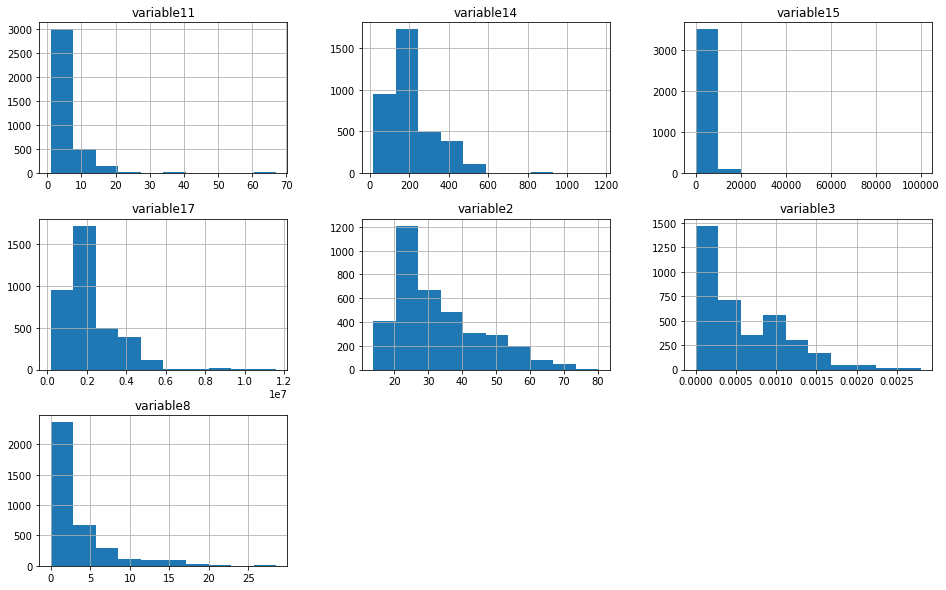

In [73]:
numeric_cols = ['variable2', 'variable3', 'variable8','variable11','variable14','variable15', 'variable17']
training_df[numeric_cols].hist(figsize = (16, 10))

we can find that numeric values vary and look in different ranges and scales

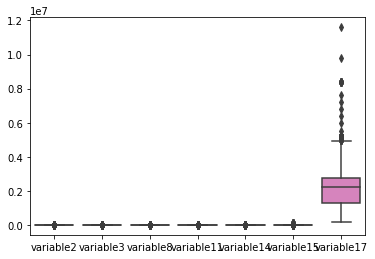

In [74]:
sns.boxplot(data = training_df[numeric_cols])

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [76]:
X = training_df.loc[:, training_df.columns != 'classLabel']
y = training_df['classLabel']

test_features = testing_df.loc[:, testing_df.columns != 'classLabel']
test_target = testing_df['classLabel']

## ML model

In [77]:
trans = MinMaxScaler()
model = LogisticRegression()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

## Performance

Our case here that we have imbalanced dataset so the best ways to evaluate our model are:
<br>
<li> Percision
<li> Recall
<li> F1

In [78]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
f1_scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#report pipeline performance
print('f1 Score: %.3f (%.3f)' % (mean(f1_scores), std(f1_scores)))

f1 Score: 0.979 (0.004)


In [79]:
recall = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('Recall: %.3f (%.3f)' % (mean(recall), std(recall)))

Recall: 0.997 (0.006)
